## ***Installing Required Library***

In [113]:
!pip install openai
!pip install langchain
!pip install kaggle
!pip install kagglehub
!pip install -U langchain langchain-experimental
!pip install -qU langchain-openai
!pip install -U langchain-community
!pip install xgboost
!pip install statsmodels

## ***Importing Required Library***

In [114]:
# Standard Library
import pandas as pd
import numpy as np
import kagglehub
from google.colab import userdata
import os
from IPython.display import Markdown
import json

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px

# Langchain Tools
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory, FileChatMessageHistory
from langchain.agents import Tool, AgentExecutor
from langchain.agents.agent_types import AgentType

# ML and Statistics
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### ***Managing Directory***

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
os.getcwd()

'/content/drive/My Drive/LangChain - LLM Agent Project/Dataset'

In [117]:
# Making New Directory
!mkdir -p '/content/drive/MyDrive/LangChain - LLM Agent Project'

In [118]:
# Change OG Directory to the new
os.chdir('/content/drive/MyDrive/LangChain - LLM Agent Project')

In [119]:
!ls

 Dataset  'LLM – Powered Data Analytics Agent '


## ***Open AI Key***

In [120]:
os.environ['OPENAI_API_KEY'] = userdata.get('OpenAI')

In [121]:
os.environ["NGROK_AUTHTOKEN"] = userdata.get('NGROK')

## ***Stage 1 - Data Handeling***

### ***Fetching Data from Kraggle***

In [122]:
!mkdir -p '/content/drive/MyDrive/LangChain - LLM Agent Project/Dataset'

In [123]:
os.chdir('/content/drive/MyDrive/LangChain - LLM Agent Project/Dataset')

In [124]:
os.getcwd()

'/content/drive/MyDrive/LangChain - LLM Agent Project/Dataset'

In [125]:
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERID')

In [126]:
!kaggle datasets download -d kyanyoga/sample-sales-data

Dataset URL: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data
License(s): CC0-1.0
sample-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [127]:
!unzip "sample-sales-data.zip"

Archive:  sample-sales-data.zip
replace sales_data_sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sales_data_sample.csv   


In [128]:
sales_df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [129]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### ***Understading and Cleaning Dataset***

In [130]:
# Load sales.csv
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [131]:
sales_df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [132]:
columns_with_null = sales_df.columns[sales_df.isnull().any()]
print(columns_with_null)
print(f"\nColumns with null values: {columns_with_null.shape[0]}")

Index(['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY'], dtype='object')

Columns with null values: 4


In [133]:
sales_df['FullAdress'] = np.where(
    sales_df['ADDRESSLINE2'].notnull(),
    sales_df['ADDRESSLINE1'] + ', ' + sales_df['ADDRESSLINE2'] + ', ' + sales_df['POSTALCODE'],
    sales_df['ADDRESSLINE1']
)

In [134]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'FullAdress'],
      dtype='object')

In [135]:
sales_df.drop(['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE'], axis=1, inplace=True)

In [136]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'CITY',
       'STATE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'FullAdress'],
      dtype='object')

In [137]:
def fromat_location(row):
  parts = [row['CITY']]

  if pd.notnull(row['STATE']):
    parts.append(row['STATE'])

  parts.append(row['COUNTRY'])
  return ', '.join(parts)

In [138]:
sales_df['LOCATION'] = sales_df.apply(fromat_location, axis=1)

In [139]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,CITY,STATE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,FullAdress,LOCATION
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,NYC,NY,USA,NaN,Yu,Kwai,Small,897 Long Airport Avenue,"NYC, NY, USA"
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,Reims,NaN,France,EMEA,Henriot,Paul,Small,59 rue de l'Abbaye,"Reims, France"
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Paris,NaN,France,EMEA,Da Cunha,Daniel,Medium,27 rue du Colonel Pierre Avia,"Paris, France"
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,Pasadena,CA,USA,NaN,Young,Julie,Medium,78934 Hillside Dr.,"Pasadena, CA, USA"
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,San Francisco,CA,USA,NaN,Brown,Julie,Medium,7734 Strong St.,"San Francisco, CA, USA"


In [140]:
territory_map = {
    "USA": "NA",         # North America
    "Canada": "NA",
    "France": "EMEA",    # Europe, Middle East, Africa
    "Germany": "EMEA",
    "UK": "EMEA",
    "Japan": "APAC",
    "Australia": "APAC",
    "India": "APAC",
    "Singapore": "APAC",
    "Brazil": "LATAM",
    "Mexico": "LATAM",
}

In [141]:
sales_df['TERRITORY'] = sales_df.apply(
    lambda row: territory_map.get(row['COUNTRY'], row['TERRITORY']) if pd.isnull(row['TERRITORY']) else row['TERRITORY'],
    axis=1
)

In [142]:
sales_df.drop(['CITY', 'STATE', 'COUNTRY'], axis=1, inplace=True)

In [143]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,FullAdress,LOCATION
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,NA,Yu,Kwai,Small,897 Long Airport Avenue,"NYC, NY, USA"
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,EMEA,Henriot,Paul,Small,59 rue de l'Abbaye,"Reims, France"
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,EMEA,Da Cunha,Daniel,Medium,27 rue du Colonel Pierre Avia,"Paris, France"
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,NA,Young,Julie,Medium,78934 Hillside Dr.,"Pasadena, CA, USA"
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,NA,Brown,Julie,Medium,7734 Strong St.,"San Francisco, CA, USA"


In [144]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'FullAdress', 'LOCATION'],
      dtype='object')

In [145]:
sales_df['contact_name'] = sales_df['CONTACTFIRSTNAME'].str.strip() + " " + sales_df['CONTACTLASTNAME'].str.strip()

In [146]:
sales_df.drop(columns=['CONTACTFIRSTNAME', 'CONTACTLASTNAME'], inplace=True)

In [147]:
sales_df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [148]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  PHONE            2823 non-null   object 
 15  TERRITORY        2823 non-null   object 
 16  DEALSIZE         2823 non-null   object 
 17  FullAdress    

In [149]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'TERRITORY', 'DEALSIZE', 'FullAdress', 'LOCATION', 'contact_name'],
      dtype='object')

In [150]:
# Convert date columns
sales_df['order_date'] = pd.to_datetime(sales_df['ORDERDATE'], errors='coerce')

In [151]:
sales_df.drop('ORDERDATE', axis=1, inplace=True)

In [152]:
# Drop rows with critical missing values
sales_df = sales_df.dropna(subset=['ORDERNUMBER', 'SALES', 'order_date'])

In [153]:
# Normalize column names
sales_df.columns = sales_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [154]:
sales_df = sales_df.apply(lambda col: col.str.strip().str.lower() if col.dtype == 'object' else col)

In [155]:
ordered_columns = [
    'ordernumber', 'order_date', 'month_id', 'year_id','qtr_id', 'status',
    'productcode', 'productline', 'msrp', 'dealsize',
    'quantityordered', 'priceeach', 'sales', 'orderlinenumber',
    'customername', 'phone', 'contact_name',
    'territory', 'location', 'fulladress'
]

# Reorder the dataframe
sales_df = sales_df[ordered_columns]

In [156]:
sales_df['month_id'] = sales_df['order_date'].dt.month
sales_df['year_id'] = sales_df['order_date'].dt.year

In [157]:
sales_df.head()

,ordernumber,order_date,month_id,year_id,qtr_id,status,productcode,productline,msrp,dealsize,quantityordered,priceeach,sales,orderlinenumber,customername,phone,contact_name,territory,location,fulladress
0,10107,2003-02-24,2,2003,1,shipped,s10_1678,motorcycles,95,small,30,95.70,2871.00,2,land of toys inc.,2125557818,kwai yu,na,"nyc, ny, usa",897 long airport avenue
1,10121,2003-05-07,5,2003,2,shipped,s10_1678,motorcycles,95,small,34,81.35,2765.90,5,reims collectables,26.47.1555,paul henriot,emea,"reims, france",59 rue de l'abbaye
2,10134,2003-07-01,7,2003,3,shipped,s10_1678,motorcycles,95,medium,41,94.74,3884.34,2,lyon souveniers,+33 1 46 62 7555,daniel da cunha,emea,"paris, france",27 rue du colonel pierre avia
3,10145,2003-08-25,8,2003,3,shipped,s10_1678,motorcycles,95,medium,45,83.26,3746.70,6,toys4grownups.com,6265557265,julie young,na,"pasadena, ca, usa",78934 hillside dr.
4,10159,2003-10-10,10,2003,4,shipped,s10_1678,motorcycles,95,medium,49,100.00,5205.27,14,corporate gift ideas co.,6505551386,julie brown,na,"san francisco, ca, usa",7734 strong st.


In [158]:
# Duplicate rows
print(f"Duplicate rows: {sales_df.duplicated().sum()}")

# Optional: remove duplicates
sales_df = sales_df.drop_duplicates()

Duplicate rows: 0


In [159]:
sales_df.describe()

,ordernumber,order_date,month_id,year_id,qtr_id,msrp,quantityordered,priceeach,sales,orderlinenumber
count,2823.000000,2823,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,2004-05-11 00:16:49.989373056,7.092455,2003.81509,2.717676,100.715551,35.092809,83.658544,3553.889072,6.466171
min,10100.000000,2003-01-06 00:00:00,1.000000,2003.00000,1.000000,33.000000,6.000000,26.880000,482.130000,1.000000
25%,10180.000000,2003-11-06 12:00:00,4.000000,2003.00000,2.000000,68.000000,27.000000,68.860000,2203.430000,3.000000
50%,10262.000000,2004-06-15 00:00:00,8.000000,2004.00000,3.000000,99.000000,35.000000,95.700000,3184.800000,6.000000
75%,10333.500000,2004-11-17 12:00:00,11.000000,2004.00000,4.000000,124.000000,43.000000,100.000000,4508.000000,9.000000
max,10425.000000,2005-05-31 00:00:00,12.000000,2005.00000,4.000000,214.000000,97.000000,100.000000,14082.800000,18.000000
std,92.085478,NaN,3.656633,0.69967,1.203878,40.187912,9.741443,20.174277,1841.865106,4.225841


In [160]:
sales_df.columns

Index(['ordernumber', 'order_date', 'month_id', 'year_id', 'qtr_id', 'status',
       'productcode', 'productline', 'msrp', 'dealsize', 'quantityordered',
       'priceeach', 'sales', 'orderlinenumber', 'customername', 'phone',
       'contact_name', 'territory', 'location', 'fulladress'],
      dtype='object')

### ***Visualiztion of Data***

In [161]:
sales_df.columns

Index(['ordernumber', 'order_date', 'month_id', 'year_id', 'qtr_id', 'status',
       'productcode', 'productline', 'msrp', 'dealsize', 'quantityordered',
       'priceeach', 'sales', 'orderlinenumber', 'customername', 'phone',
       'contact_name', 'territory', 'location', 'fulladress'],
      dtype='object')

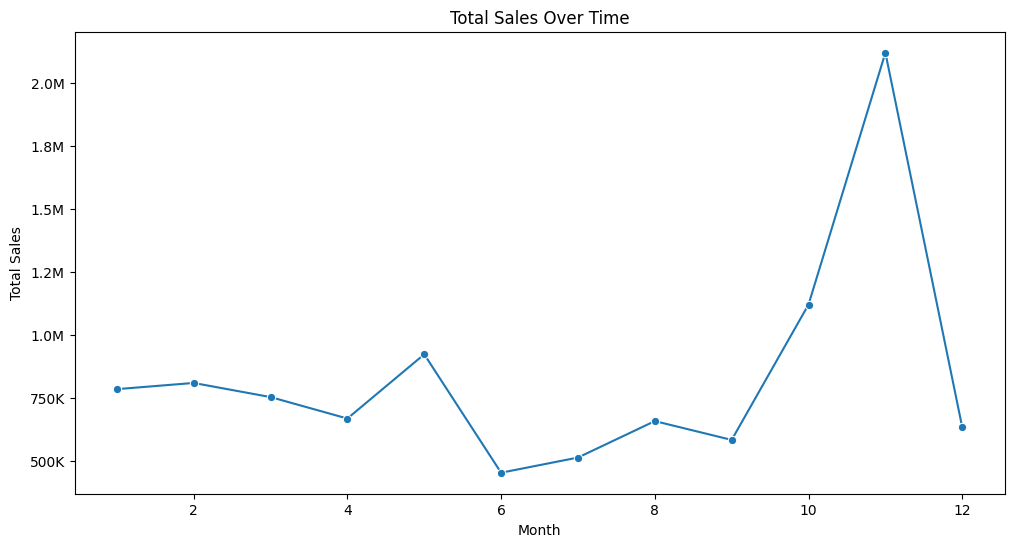

In [162]:
# Total Sales Over Time (Line Plot)
monthly_sales = sales_df.groupby(sales_df['month_id'])['sales'].sum().reset_index()

# Format function: converts 2000000 → 2M, 500000 → 500K
def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}K'
    else:
        return str(int(x))

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month_id', y='sales',marker='o')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Text(0, 0.5, 'Total Sales')

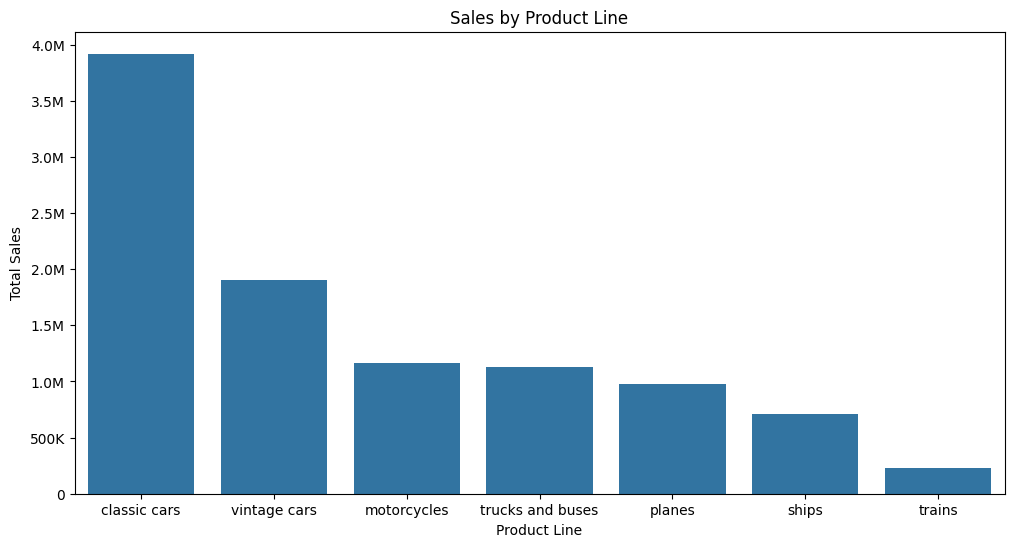

In [163]:
# Sales by Product Line (Bar Plot)
product_sales = sales_df.groupby('productline')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=product_sales, x='productline', y='sales')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')


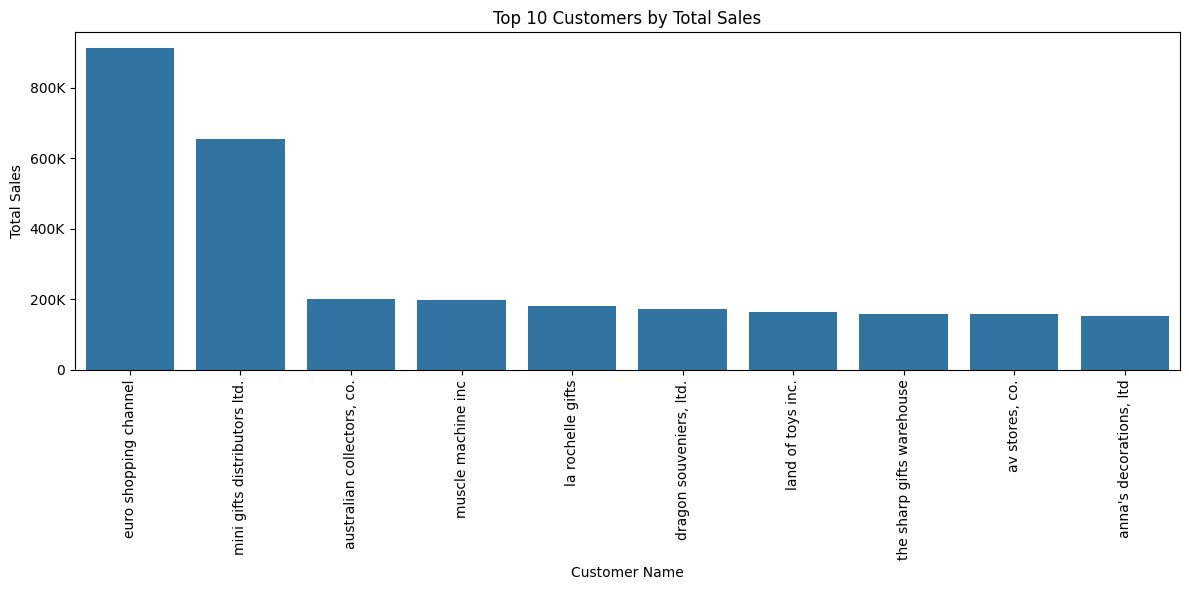

In [164]:
# Top 10 Customers by Total Sales
top_customers = sales_df.groupby('customername')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_customers.reset_index(), x='customername', y='sales')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

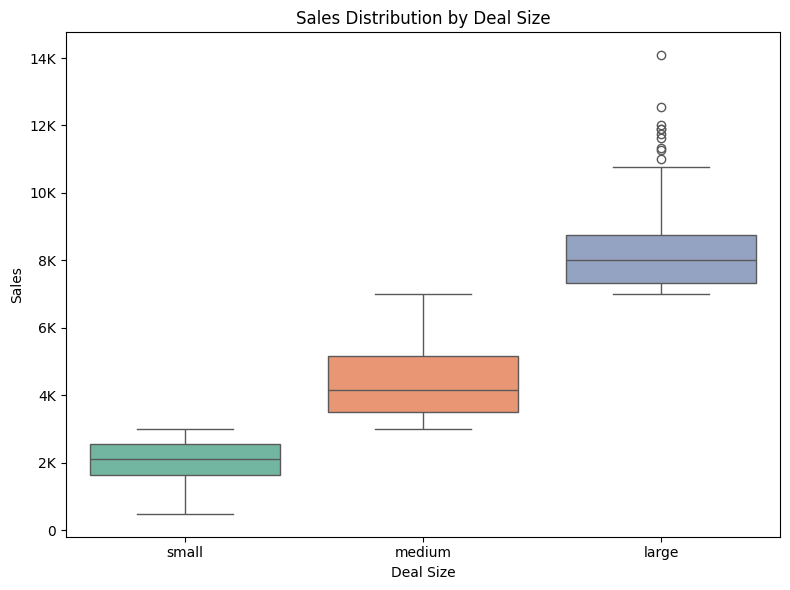

In [165]:
# Sales Distribution by Deal Size
plt.figure(figsize=(8, 6))
sns.boxplot(x='dealsize', y='sales', data=sales_df, palette='Set2', hue='dealsize')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Sales Distribution by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

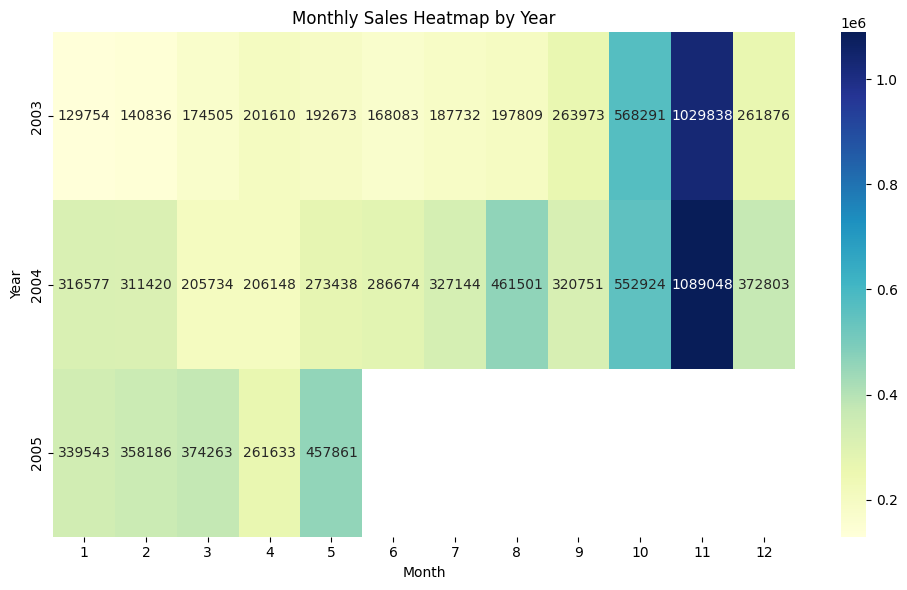

In [166]:
heatmap_data = sales_df.pivot_table(
    values='sales',
    index='year_id',
    columns='month_id',
    aggfunc='sum'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Monthly Sales Heatmap by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


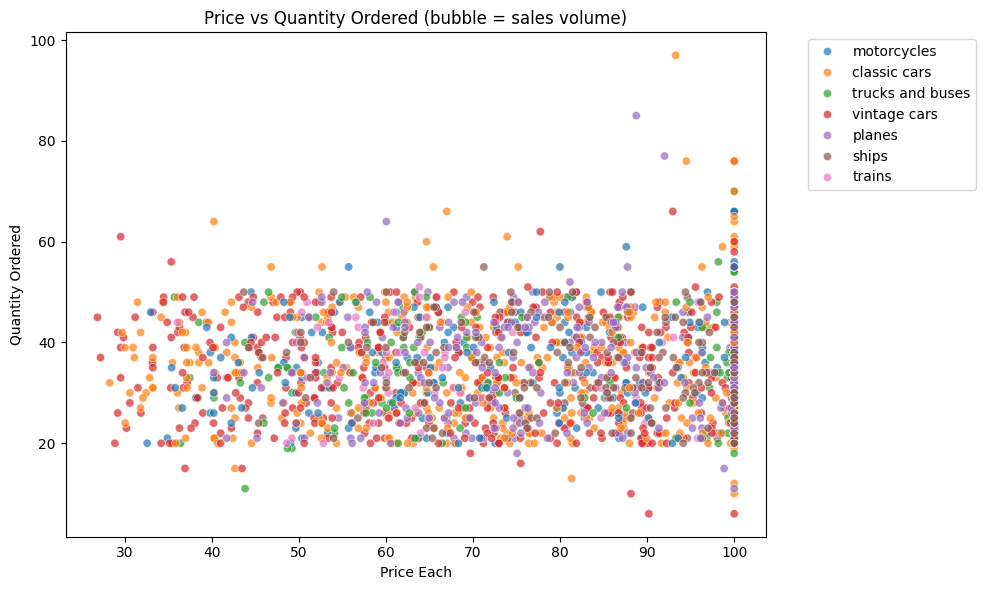

In [167]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='priceeach', y='quantityordered', hue='productline', data=sales_df, alpha=0.7)
plt.title('Price vs Quantity Ordered (bubble = sales volume)')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


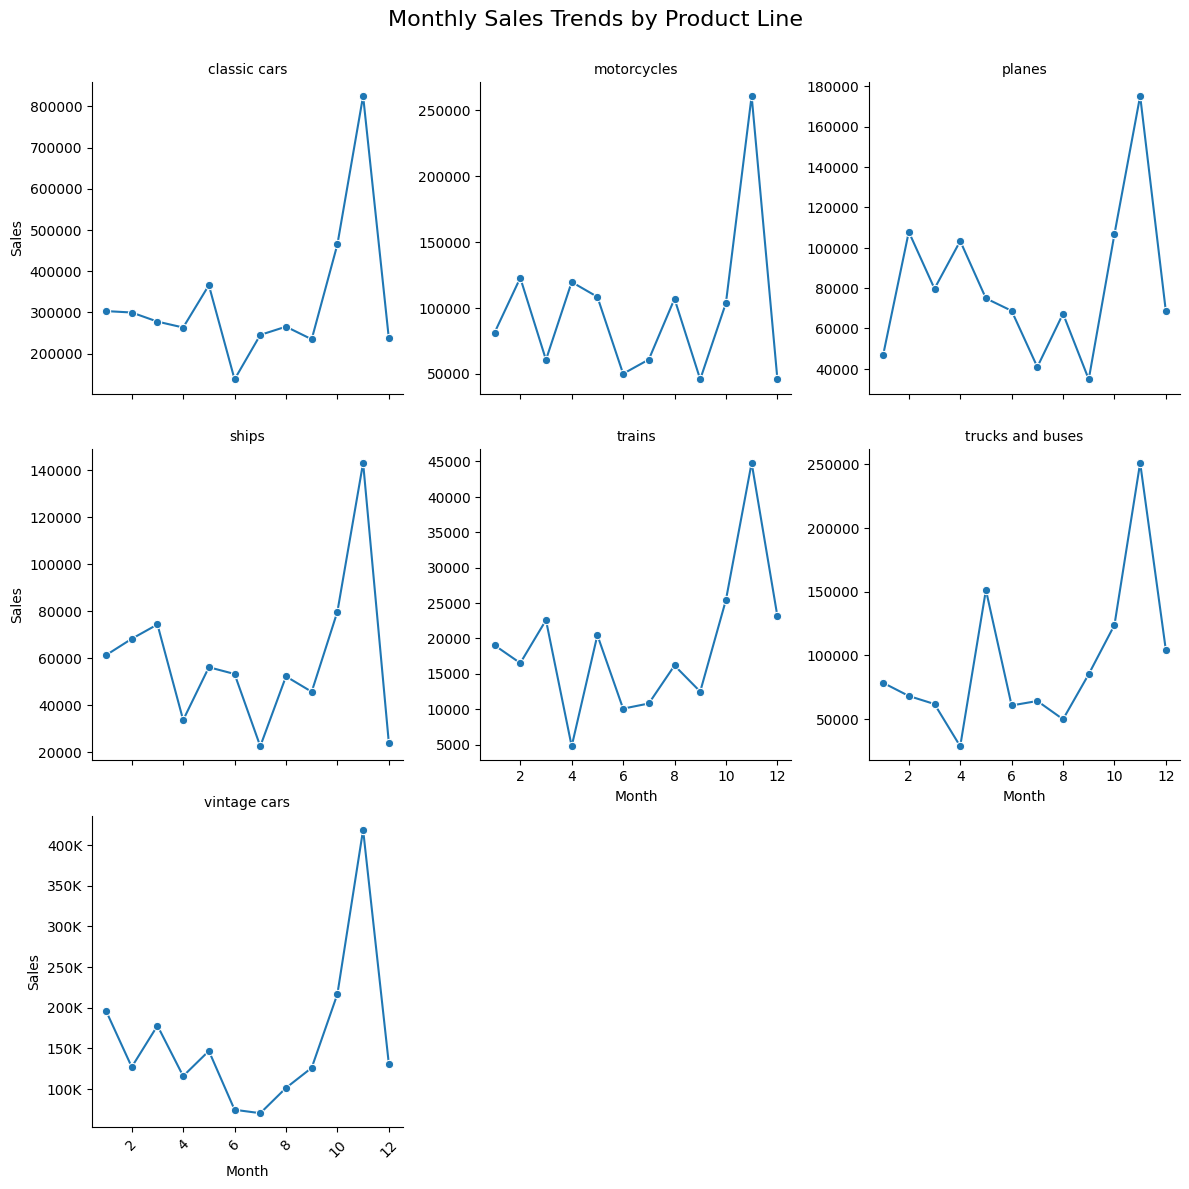

In [168]:
monthly_product_sales = sales_df.groupby(['month_id', 'productline'])['sales'].sum().reset_index()

g = sns.FacetGrid(monthly_product_sales, col="productline", col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, "month_id", "sales", marker="o")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Sales")
g.fig.suptitle('Monthly Sales Trends by Product Line', fontsize=16)
g.fig.subplots_adjust(top=0.92)
plt.xticks(rotation=45)
plt.show()


### ***Saving CSV File***

In [169]:
sales_df.to_csv("/content/drive/MyDrive/LangChain - LLM Agent Project/Dataset/cleaned_sales_data.csv", index=False)

In [170]:
sales_df.head(2)

,ordernumber,order_date,month_id,year_id,qtr_id,status,productcode,productline,msrp,dealsize,quantityordered,priceeach,sales,orderlinenumber,customername,phone,contact_name,territory,location,fulladress
0,10107,2003-02-24,2,2003,1,shipped,s10_1678,motorcycles,95,small,30,95.70,2871.0,2,land of toys inc.,2125557818,kwai yu,na,"nyc, ny, usa",897 long airport avenue
1,10121,2003-05-07,5,2003,2,shipped,s10_1678,motorcycles,95,small,34,81.35,2765.9,5,reims collectables,26.47.1555,paul henriot,emea,"reims, france",59 rue de l'abbaye


## ***Stage 2 - Building LLM Analytic***

In [171]:
sales_df.head(2)

,ordernumber,order_date,month_id,year_id,qtr_id,status,productcode,productline,msrp,dealsize,quantityordered,priceeach,sales,orderlinenumber,customername,phone,contact_name,territory,location,fulladress
0,10107,2003-02-24,2,2003,1,shipped,s10_1678,motorcycles,95,small,30,95.70,2871.0,2,land of toys inc.,2125557818,kwai yu,na,"nyc, ny, usa",897 long airport avenue
1,10121,2003-05-07,5,2003,2,shipped,s10_1678,motorcycles,95,small,34,81.35,2765.9,5,reims collectables,26.47.1555,paul henriot,emea,"reims, france",59 rue de l'abbaye


In [172]:
llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo')

In [173]:
memory = ConversationBufferMemory(chat_memory=FileChatMessageHistory("memory.json"))

### ***Agents***

### ***Tools for Agent***

##### ***Support Fuctions***

In [174]:
def wrap_tool(func, name, description):
    def wrapped(input_str):
        try:
            # Check if func accepts 'df' and 'input_str'
            import inspect
            sig = inspect.signature(func)

            # If the function expects 'df' as the first arg, pass sales_df
            if 'df' in sig.parameters and list(sig.parameters.keys())[0] == 'df':
                if 'input_str' in sig.parameters and input_str is not None and input_str.strip() != "":
                    result = func(sales_df, input_str=input_str)
                else:
                    result = func(sales_df)

            else: # If the function doesn't take df as first arg (unlikely for your current setup, but for robustness)
                if 'input_str' in sig.parameters and input_str is not None and input_str.strip() != "":
                    result = func(input_str=input_str)
                else:
                    result = func()

            # Special handling for dict results (e.g., from forcast_sales, time_series_decompose)
            if isinstance(result, dict):

                output_parts = []

                for key, value in result.items():
                    if hasattr(value, 'to_markdown'):
                        output_parts.append(f"### {key.replace('_', ' ').title()}:\n{value.to_markdown(index=False)}")
                    else: # For plot_path or messages
                        output_parts.append(f"### {key.replace('_', ' ').title()}:\n{str(value)}")
                return "\n\n".join(output_parts)

            elif hasattr(result, 'to_markdown'):
                return result.to_markdown(index=False)

            else: # This handles the direct string returns from the functions
                return str(result)

        except Exception as e:
            # Provide more context for the error
            return f"⚠️ Error in {name} (function: {func.__name__}): {str(e)}"

    return Tool.from_function(func=wrapped, name=name, description=description)

##### ***- Predict future sales using a machine learning model XGBoost***

In [175]:
def forcast_sales(df, input_str=None):
    periods = 6
    df_copy = df.copy()

    # Guard against malformed input (e.g. code instead of a product line name)
    if input_str and "df[" in input_str:
        return pd.DataFrame({"Message": [f"⚠️ Invalid input format: {input_str}. Please provide just a product line name like 'Motorcycles'."]})

    # Filter if product line input is given
    if input_str:
        input_str = input_str.strip().lower()
        df_copy = df_copy[df_copy['productline'].str.lower().str.contains(input_str, na=False)]
        if df_copy.empty:
            return pd.DataFrame({"Message": [f"No sales data found for product line: {input_str}"]})

    # Validate required columns
    if 'order_date' not in df_copy.columns or 'sales' not in df_copy.columns:
        return pd.DataFrame({"Message": ["Required columns 'order_date' or 'sales' are missing."]})

    # Removing outliers using IQR
    Q1 = df_copy['sales'].quantile(0.25)
    Q3 = df_copy['sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy['sales'] >= lower_bound) & (df_copy['sales'] <= upper_bound)]

    # Feature engineering
    df_copy['order_date'] = pd.to_datetime(df_copy['order_date'])
    df_copy = df_copy.sort_values('order_date')
    df_copy['month'] = df_copy['order_date'].dt.month
    df_copy['year'] = df_copy['order_date'].dt.year
    df_copy['lag_1'] = df_copy['sales'].shift(1)
    df_copy['lag_3'] = df_copy['sales'].shift(3)
    df_copy['rolling_mean_3'] = df_copy['sales'].rolling(3).mean()
    df_copy.dropna(inplace=True)

    features = ['month', 'year', 'lag_1', 'lag_3', 'rolling_mean_3']
    X = df_copy[features].values
    y = df_copy['sales'].values

    if len(X) < 2:
        return pd.DataFrame({"Message": ["Not enough data to perform sales forecasting."]})

    # Split data for training/testing
    test_size = int(len(X) * 0.2)
    if test_size < 1:
        test_size = 1 if len(X) > 1 else 0

    if test_size == 0:
        X_train, y_train = X, y
        X_test, y_test = pd.DataFrame(), pd.Series()
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Train XGBoost model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Start forecasting from the last known values
    last_row = df_copy.iloc[-1]
    future_rows = []

    current_month = last_row['month']
    current_year = last_row['year']
    last_lag_1 = last_row['sales']
    last_lag_3 = df_copy['sales'].iloc[-3]
    rolling_window = list(df_copy['sales'].iloc[-3:])

    for _ in range(periods):
        # Generate features
        rolling_mean_3 = np.mean(rolling_window)
        features_input = [[current_month, current_year, last_lag_1, last_lag_3, rolling_mean_3]]

        # Predict next value
        prediction = model.predict(features_input)[0]

        # Save forecast
        future_rows.append({
            'Month': pd.Timestamp(year=current_year, month=current_month, day=1),
            'Predicted_Sales': round(prediction, 2)
        })

        # Update for next forecast step
        last_lag_3 = last_lag_1
        last_lag_1 = prediction
        rolling_window.pop(0)
        rolling_window.append(prediction)

        # Increment month/year
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

    forecast_df = pd.DataFrame(future_rows)

    # Metrics (if test data exists)
    if not X_test.size > 0:
        y_pred_test = model.predict(X_test)
        metrics = {
            'MSE': round(mean_squared_error(y_test, y_pred_test), 2),
            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2),
            'MAE': round(mean_absolute_error(y_test, y_pred_test), 2),
            'R2': round(r2_score(y_test, y_pred_test), 2)
        }
    else:
        metrics = {"Message": "Not enough data to evaluate model performance."}

    # Optional: markdown formatting for LangChain agent or Streamlit
    return {
        'Forecast Table': forecast_df,
        'Metrics': metrics
    }


In [176]:
def forecasting_tool(input_str=None):
    product_line = input_str.strip() or None
    result = forcast_sales(sales_df, input_str=product_line)
    if isinstance(result, dict) and "forcast_df" in result:
        return result["forcast_df"].to_markdown(index=False)
    return str(result)

##### ***- Flag unusual sales that deviate from expected patterns (z-score method)***

In [200]:
def detect_anomalies(df, input_str=None):
    if 'sales' not in df.columns or 'order_date' not in df.columns:
        return pd.DataFrame({"Message": ["Required columns 'sales' or 'order_date' are missing for anomaly detection."]})

    df_anom = df.copy()
    df_anom['z_score'] = zscore(df_anom['sales'])
    anomalies = df_anom[abs(df_anom['z_score']) > 3]

    if anomalies.empty:
        return pd.DataFrame({"Message": ["✅ No significant anomalies detected (Z-score > 3)."]})

    top_anomalies = anomalies[['order_date', 'sales', 'z_score']].sort_values(by='z_score', ascending=False).head(5)

    return top_anomalies

In [201]:
def anomaly_detection_tool(input_str=None):
    df_copy = sales_df.copy()

    # Optional filtering by product line or region
    if input_str:
        input_str = input_str.lower()
        df_copy = df_copy[
            df_copy['productline'].str.lower().str.contains(input_str, na=False) |
            df_copy['territory'].str.lower().str.contains(input_str, na=False) |
            df_copy['location'].str.lower().str.contains(input_str, na=False)
        ]
        if df_copy.empty:
            return f"⚠️ No matching data found for filter: {input_str}"

    result = detect_anomalies(df_copy)

    if isinstance(result, pd.DataFrame):
        if "Message" in result.columns:
            return result.to_markdown(index=False)

        count = len(result)
        top = result.iloc[0]
        date = pd.to_datetime(top['order_date']).strftime('%Y-%m-%d')
        sales_amt = round(top['sales'], 2)
        z_score = round(top['z_score'], 2)

        return (
            f"🔍 **Detected {count} anomalous sales entries** with Z-score > 3 "
            f"(indicating significant deviation from average sales).\n\n"
            f"📌 **Top anomaly:**\n"
            f"- Date: **{date}**\n"
            f"- Sales: **${sales_amt}**\n"
            f"- Z-score: **{z_score}**\n\n"
            f"📊 **Top 5 anomalies:**\n\n"
            f"{result.head(5).to_markdown(index=False)}"
        )

    return str(result)

##### ***- Provide aggregated sales metrics by country or territory.***

In [179]:
def region_sales_breakdown(df, input_str=None):
    if 'territory' not in df.columns or 'location' not in df.columns or 'sales' not in df.columns:
        return pd.DataFrame({"Message": ["Required columns 'territory', 'location', or 'sales' are missing for regional breakdown."]})

    filtered_df = df.copy()
    if input_str:
        # Assuming input_str can match either 'territory' or 'location'
        filtered_df = filtered_df[
            filtered_df['territory'].str.contains(input_str, case=False, na=False) |
            filtered_df['location'].str.contains(input_str, case=False, na=False)
        ]
        if filtered_df.empty:
             return pd.DataFrame({"Message": [f"No sales data found for region/territory: {input_str}"]})

    result = filtered_df.groupby(['territory', 'location'], dropna=False)['sales'].agg(['sum', 'mean', 'median', 'count']).reset_index()
    result.columns = ['Territory', 'Location', 'Total Sales', 'Average Sales', 'Median Sales', 'Number of Sales']
    return result.sort_values(by='Total Sales', ascending=False)

In [180]:
def region_sales_tool(input_str=None):
    result = region_sales_breakdown(sales_df, input_str=input_str)
    if isinstance(result, pd.DataFrame):
        return result.to_markdown(index=False)
    return str(result)

##### ***- Profitability Analysis***

In [181]:
def profitability_tool(df, input: str = None):
    df = df.copy()  # Or however you're accessing your data

    # Ensure required columns exist
    required_cols = ['sales', 'msrp', 'quantityordered', 'productline', 'territory']
    if not all(col in df.columns for col in required_cols):
        return "⚠️ Required columns are missing for profitability analysis."

    # Calculate profit and per-unit profit
    df['profit'] = df['sales'] - (df['msrp'] * df['quantityordered'])
    df['per_unit_profit'] = df['profit'] / df['quantityordered']

    # Apply optional filter
    if input:
        input = input.lower()
        df = df[
            df['productline'].str.lower().str.contains(input, na=False) |
            df['territory'].str.lower().str.contains(input, na=False)
        ]
        if df.empty:
            return f"⚠️ No profitability data found for filter: **{input}**"

    # Aggregate
    grouped = df.groupby(['productline', 'territory'], dropna=False).agg(
        Total_Profit=('profit', 'sum'),
        Avg_Per_Unit_Profit=('per_unit_profit', 'mean'),
        Units_Sold=('quantityordered', 'sum')
    ).reset_index().sort_values(by='Total_Profit', ascending=False)

    return ({
        "message": f"📊 Profitability analysis{' for ' + input if input else ''}:",
        "data": grouped
    })


##### ***- Time Series Decomposition***

In [182]:
def time_series_decompose(df):
    if 'order_date' not in df.columns or 'sales' not in df.columns:
        return pd.DataFrame({"Message": ["Required columns 'order_date' or 'sales' are missing for time series decomposition."]})

    # Ensure datetime index and monthly frequency
    df_ts = df.copy()
    df_ts['order_date'] = pd.to_datetime(df_ts['order_date'])
    df_ts = df_ts.set_index('order_date').resample('M').sum(numeric_only=True)

    if len(df_ts) < 24:
        return pd.DataFrame({"Message": ["Not enough data points for meaningful time series decomposition. Need at least 24 months of data."]})

    try:
        result = seasonal_decompose(df_ts['sales'], model='multiplicative', period=12)
    except Exception as e:
        return pd.DataFrame({"Message": [f"Error during time series decomposition: {str(e)}"]})

    # Plot and save
    fig = result.plot()
    plot_path = "/mnt/data/time_series_decomposition_plot.png"
    fig.set_size_inches(10, 8)
    plt.tight_layout()
    fig.savefig(plot_path)
    plt.close()

    # Return summary
    summary_df = pd.DataFrame({
        "Trend": result.trend.dropna().head(12),
        "Seasonal": result.seasonal.dropna().head(12),
        "Residual": result.resid.dropna().head(12)
    })

    return {
        "summary_df": summary_df,
        "plot_path": plot_path
    }

In [183]:
def time_series_tool(_: str = None):
    result = time_series_decompose(sales_df)

    if isinstance(result, dict):
        summary_md = result["summary_df"].to_markdown(index=True)
        plot_path = result["plot_path"]
        return f"### Time Series Decomposition Summary (First 12 Months)\n\n{summary_md}\n\n![Decomposition Plot]({plot_path})"

    if isinstance(result, pd.DataFrame):
        return result.to_markdown(index=False)

    return str(result)

##### ***- Natural Language Report Generator***

In [184]:
def generate_report(df):
    required_cols = ['sales', 'customername', 'productline', 'territory']  # changed from 'country'

    if not all(col in df.columns for col in required_cols):
        return pd.DataFrame({"Message": ["Required columns for report generation are missing."]})

    total_sales = df['sales'].sum().round(2)
    unique_customers = df['customername'].nunique()
    unique_products = df['productline'].nunique()
    top_territory = df['territory'].value_counts().idxmax()

    report = f"""
## 📊 Sales Summary Report

- **Total Sales:** ${total_sales:,.2f}
- **Unique Customers:** {unique_customers}
- **Unique Product Lines:** {unique_products}
- **Top Territory by Order Volume:** {top_territory}
    """
    return report.strip()

In [185]:
def report_tool(_: str = None):
    return generate_report(sales_df)

##### ***Define Tools***

In [186]:
extra_tools = [
    wrap_tool(
        func=forcast_sales,
        name="SalesForecastingToolXGBoost",
        description=(
            "Forecast future monthly sales using XGBoost regression for the entire dataset or a specific product line. "
            "If no input is provided, forecasts for all product lines combined. Returns forecast data and performance metrics."
        )
    ),
    wrap_tool(
        func=anomaly_detection_tool,
        name="AnomalyDetectionTool",
        description=(
            "Detect unusual sales that deviate from expected patterns using Z-score > 3. "
            "Accepts optional product line or region as input."
        )
    ),
    wrap_tool(
        func=region_sales_tool,
        name="RegionSalesBreakdownTool",
        description=(
            "Returns aggregated sales metrics (sum, mean, median, count) by territory and location. "
            "Accepts optional region or territory name as input."
        )
    ),
    wrap_tool(
        func=profitability_tool,
        name="ProfitabilityAnalysisTool",
        description=(
            "Analyzes profitability across product lines and regions. "
            "Accepts optional filter for product line or territory."
        )
    ),
    wrap_tool(
        func=time_series_tool,
        name="TimeSeriesDecompositionTool",
        description=(
            "Performs seasonal decomposition on sales time series. "
            "Requires at least 24 months of data. Returns trend, seasonal, residual data and a saved plot path."
        )
    ),
    wrap_tool(
        func=report_tool,
        name="ReportGeneratorTool",
        description=(
            "Generates a high-level markdown report with total sales, customer count, product diversity, and top country."
        )
    )
]


### ***LLM Agent Setup***

In [202]:
dc_agent = create_pandas_dataframe_agent(
    llm = llm,                                # Language model to use for the agent
    df = sales_df,                                  # Pandas DataFrame
    verbose = True,                                 # Print out verbose information
    agent_type = AgentType.ZERO_SHOT_REACT_DESCRIPTION, # A zero shot agent that does a reasoning step before acting.
    extra_tools = extra_tools,                      # Custom Tools
    allow_dangerous_code = True,                    # This agent evaluates real Python code.
    include_df_in_prompt = False,                    # Keeps Promt Size manageable for large Dataframe
    number_of_head_rows = 5,                        # Shows Sample rows for context
    max_iterations = 15,                            # Number of Itteration for the LLM
    early_stopping_method = "generate",             # This agent evaluates real Python code.
)

## ***Testing***

In [206]:
print("--- Testing Sales Forecasting Tool ---")
query_forecast = "Forecast sales for the Motorcycles productline."
response_forecast = dc_agent.run(query_forecast)
print(response_forecast)

--- Testing Sales Forecasting Tool ---


> Entering new AgentExecutor chain...
Thought: We need to use the SalesForecastingToolXGBoost tool with the input being the Motorcycles product line.
Action: SalesForecastingToolXGBoost
Action Input: "Motorcycles"### Forecast Table:
| Month               |   Predicted_Sales |
|:--------------------|------------------:|
| 2005-05-01 00:00:00 |           3204.95 |
| 2005-06-01 00:00:00 |           2945.38 |
| 2005-07-01 00:00:00 |           3218.5  |
| 2005-08-01 00:00:00 |           3198.29 |
| 2005-09-01 00:00:00 |           3215.19 |
| 2005-10-01 00:00:00 |           3395.19 |

### Metrics:
{'Message': 'Not enough data to evaluate model performance.'}The forecast table for the Motorcycles product line has been generated, but there is not enough data to evaluate the model performance.
Final Answer: The forecasted sales for the Motorcycles product line are provided, but the model performance evaluation is not available due to insufficient data.



In [204]:
print("\n--- Testing Anomaly Detection Tool ---")
query_anomaly = "Detect any anomalies in the sales data."
response_anomaly = dc_agent.run(query_anomaly)
print(response_anomaly)


--- Testing Anomaly Detection Tool ---


> Entering new AgentExecutor chain...
Thought: We should use the AnomalyDetectionTool to detect any unusual sales patterns.
Action: AnomalyDetectionTool
Action Input: df🔍 **Detected 1 anomalous sales entries** with Z-score > 3 (indicating significant deviation from average sales).

📌 **Top anomaly:**
- Date: **2005-03-03**
- Sales: **$10066.6**
- Z-score: **3.83**

📊 **Top anomalies:**

| order_date          |   sales |   z_score |
|:--------------------|--------:|----------:|
| 2005-03-03 00:00:00 | 10066.6 |   3.83265 |I have identified 1 anomalous sales entry with a Z-score greater than 3.
Final Answer: There is 1 anomalous sales entry in the data.

> Finished chain.
There is 1 anomalous sales entry in the data.


In [192]:
print("\n--- Testing Region Sales Breakdown Tool ---")
query_region = "Show me the sales breakdown for the NA."
response_region = dc_agent.run(query_region)
print(response_region)


--- Testing Region Sales Breakdown Tool ---


> Entering new AgentExecutor chain...
Thought: We need to use the RegionSalesBreakdownTool to get the sales breakdown for the NA region.
Action: RegionSalesBreakdownTool
Action Input: "NA"| Territory   | Location                 |   Total Sales |   Average Sales |   Median Sales |   Number of Sales |
|:------------|:-------------------------|--------------:|----------------:|---------------:|------------------:|
| na          | san rafael, ca, usa      |     654858    |         3638.1  |        3358.55 |               180 |
| na          | nyc, ny, usa             |     560788    |         3689.39 |        3252.66 |               152 |
| na          | san francisco, ca, usa   |     224359    |         3618.69 |        3149.93 |                62 |
| na          | new bedford, ma, usa     |     207875    |         3407.78 |        3013.97 |                61 |
| emea        | nantes, france           |     204305    |         3405.08 |     

In [193]:
print("\n--- Testing Profitability Analysis Tool ---")
query_profit = "What are the most profitable product?"
response_profit = dc_agent.run(query_profit)
print(response_profit)


--- Testing Profitability Analysis Tool ---


> Entering new AgentExecutor chain...
Thought: To determine the most profitable product, we should use the ProfitabilityAnalysisTool.
Action: ProfitabilityAnalysisTool
Action Input: "Most profitable product"### Message:
📊 Profitability analysis:

### Data:
| productline      | territory   |   Total_Profit |   Avg_Per_Unit_Profit |   Units_Sold |
|:-----------------|:------------|---------------:|----------------------:|-------------:|
| vintage cars     | na          |       41418.7  |              4.3241   |         8715 |
| motorcycles      | emea        |       29096.7  |              6.55507  |         5072 |
| trains           | emea        |       25558.2  |             17.2845   |         1544 |
| vintage cars     | apac        |       23230.1  |             11.6008   |         2200 |
| trucks and buses | emea        |       21132.8  |              4.26567  |         4633 |
| planes           | na          |       19944    |        


--- Testing Time Series Decomposition Tool ---


> Entering new AgentExecutor chain...
Thought: We should use the TimeSeriesDecompositionTool for this task.
Action: TimeSeriesDecompositionTool
Action Input: df

/tmp/ipython-input-182-3094266649.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ts = df_ts.set_index('order_date').resample('M').sum(numeric_only=True)


⚠️ Error in TimeSeriesDecompositionTool (function: time_series_tool): [Errno 2] No such file or directory: '/mnt/data/time_series_decomposition_plot.png'It seems like the TimeSeriesDecompositionTool requires a file path as input instead of the dataframe itself. We need to save the dataframe to a file first.
Action: python_repl_ast
Action Input: df.to_csv('sales_data.csv', index=False)The dataframe has been successfully saved to a CSV file named 'sales_data.csv'.
Action: TimeSeriesDecompositionTool
Action Input: 'sales_data.csv'

/tmp/ipython-input-182-3094266649.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ts = df_ts.set_index('order_date').resample('M').sum(numeric_only=True)


⚠️ Error in TimeSeriesDecompositionTool (function: time_series_tool): [Errno 2] No such file or directory: '/mnt/data/time_series_decomposition_plot.png'It seems like the TimeSeriesDecompositionTool is looking for a specific file path to save the plot. We need to specify the path where we want to save the plot.
Action: TimeSeriesDecompositionTool
Action Input: 'sales_data.csv'

/tmp/ipython-input-182-3094266649.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ts = df_ts.set_index('order_date').resample('M').sum(numeric_only=True)


⚠️ Error in TimeSeriesDecompositionTool (function: time_series_tool): [Errno 2] No such file or directory: '/mnt/data/time_series_decomposition_plot.png'It appears that the TimeSeriesDecompositionTool is not able to save the plot to the specified path. We may need to provide a different file path or investigate further why the tool is unable to save the plot.
Final Answer: Further investigation is needed to successfully decompose the sales time series.

> Finished chain.
Further investigation is needed to successfully decompose the sales time series.


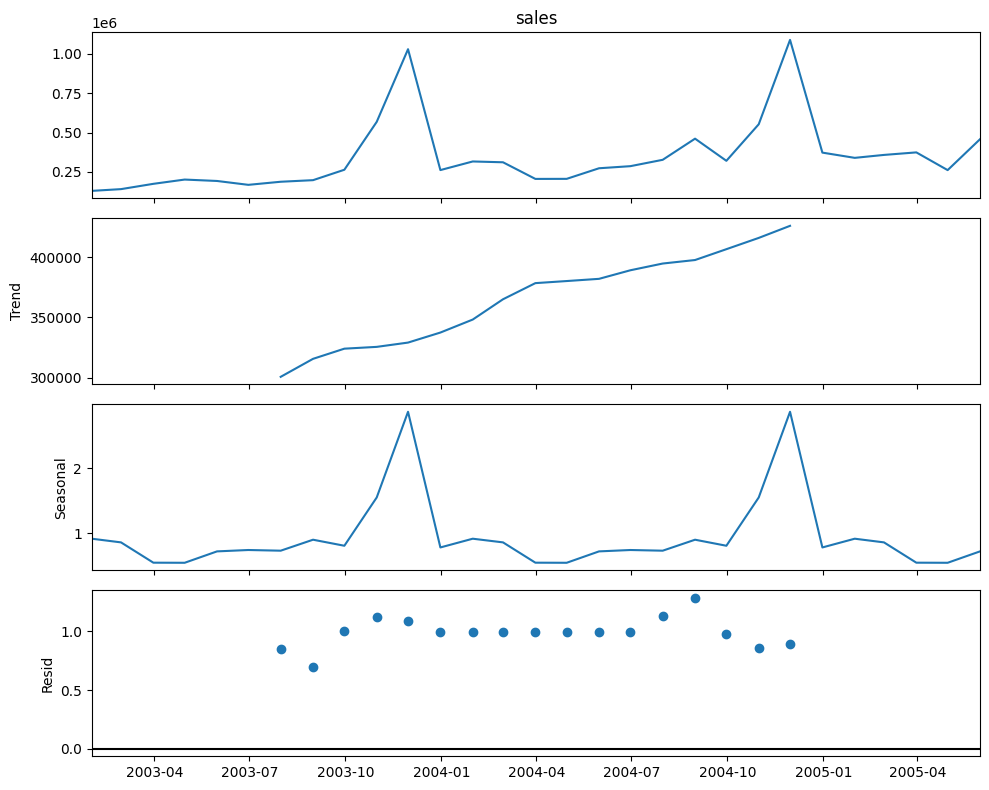

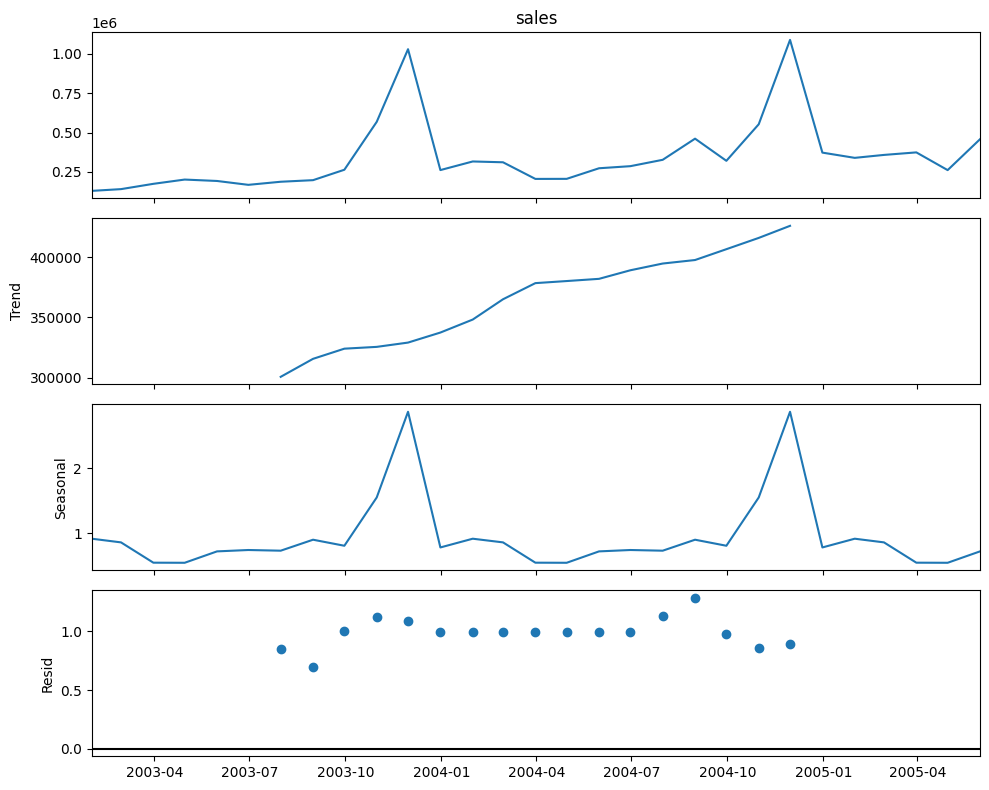

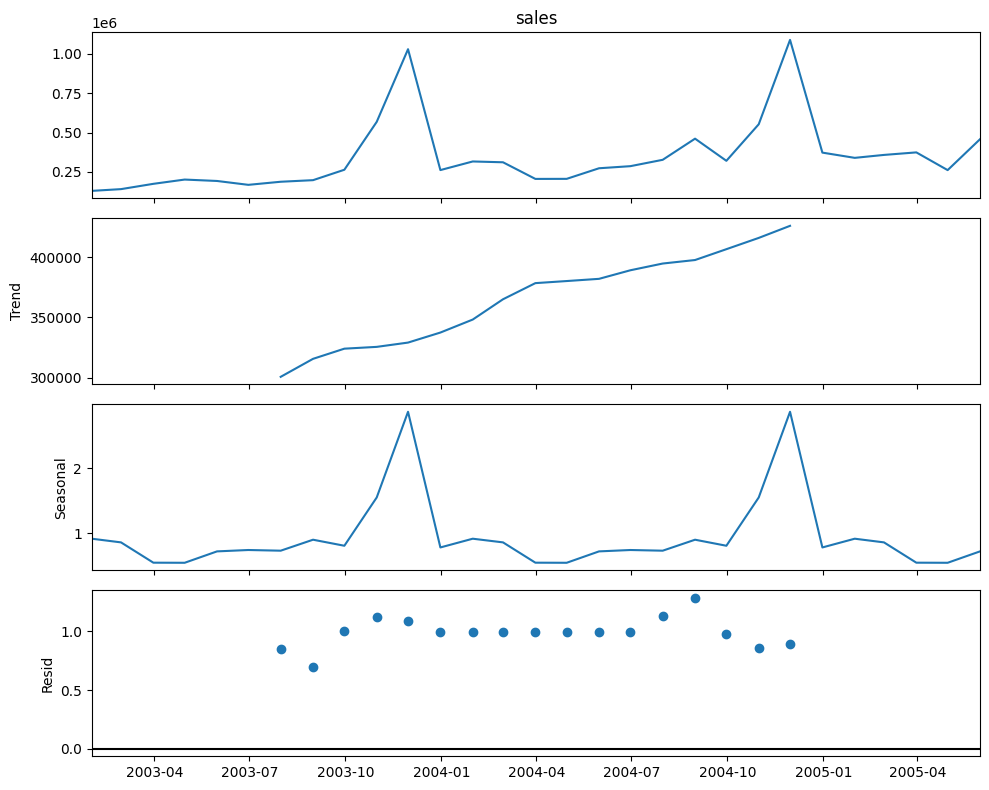

In [194]:
print("\n--- Testing Time Series Decomposition Tool ---")
query_ts_decompose = "Decompose the sales time series."
response_ts_decompose = dc_agent.run(query_ts_decompose)
print(response_ts_decompose)

In [195]:
print("\n--- Testing Report Generator Tool ---")
query_report = "Generate a summary report of sales performance."
response_report = dc_agent.run(query_report)
print(response_report)


--- Testing Report Generator Tool ---


> Entering new AgentExecutor chain...
Thought: To generate a summary report of sales performance, we can use the ReportGeneratorTool.
Action: ReportGeneratorTool
Action Input: ""## 📊 Sales Summary Report

- **Total Sales:** $10,032,628.85
- **Unique Customers:** 92
- **Unique Product Lines:** 7
- **Top Territory by Order Volume:** emeaI now know the final answer
Final Answer: The summary report of sales performance has been generated successfully.

> Finished chain.
The summary report of sales performance has been generated successfully.


In [196]:
print("--- Testing Sales Forecasting Tool ---")
query_forecast = "Top selling product"
response_forecast = dc_agent.run(query_forecast)
print(response_forecast)

--- Testing Sales Forecasting Tool ---


> Entering new AgentExecutor chain...
Thought: To find the top selling product, I should look at the aggregated sales data for each product line.
Action: RegionSalesBreakdownTool
Action Input: "product line"| Message                                                |
|:-------------------------------------------------------|
| No sales data found for region/territory: product line |The RegionSalesBreakdownTool did not return any sales data for the specified product line. I should try a different approach.
Action: ProfitabilityAnalysisTool
Action Input: "product line"### Message:
📊 Profitability analysis:

### Data:
| productline      | territory   |   Total_Profit |   Avg_Per_Unit_Profit |   Units_Sold |
|:-----------------|:------------|---------------:|----------------------:|-------------:|
| vintage cars     | na          |       41418.7  |              4.3241   |         8715 |
| motorcycles      | emea        |       29096.7  |              

In [199]:
print("--- Testing Sales Forecasting Tool ---")
query_forecast = "Least Selling Product"
response_forecast = dc_agent.run(query_forecast)
print(response_forecast)

--- Testing Sales Forecasting Tool ---


> Entering new AgentExecutor chain...
Thought: To find the least selling product, I need to analyze the sales data.
Action: Use the RegionSalesBreakdownTool to get aggregated sales metrics by product line.
Action Input: "Product Line"Use the RegionSalesBreakdownTool to get aggregated sales metrics by product line. is not a valid tool, try one of [python_repl_ast, SalesForecastingToolXGBoost, AnomalyDetectionTool, RegionSalesBreakdownTool, ProfitabilityAnalysisTool, TimeSeriesDecompositionTool, ReportGeneratorTool].I should use the ProfitabilityAnalysisTool to analyze the profitability across product lines.
Action: ProfitabilityAnalysisTool
Action Input: "Product Line"### Message:
📊 Profitability analysis:

### Data:
| productline      | territory   |   Total_Profit |   Avg_Per_Unit_Profit |   Units_Sold |
|:-----------------|:------------|---------------:|----------------------:|-------------:|
| vintage cars     | na          |       41418.7  |